In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# For Filtering the warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('/content/kidney_disease.csv')

In [3]:
data.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


ckd=chronic kidney disease

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [7]:
data.classification.unique()

array(['ckd', 'notckd'], dtype=object)

In [9]:
data['classification'] = data['classification'].str.strip()  # Remove spaces/tabs
data['classification'] = data['classification'].replace({'ckd\t': 'ckd'})  # Fix label errors


In [10]:
data.classification.unique()

array(['ckd', 'notckd'], dtype=object)

In [11]:
data.drop('id', axis = 1, inplace = True)

In [12]:
data.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [13]:
data['classification'] = data['classification'].replace(['ckd','notckd'], [1,0])

In [14]:
data.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,1
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,1
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,1
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,1
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,1


In [15]:
data.isnull().sum()

,0
age,9
bp,12
sg,47
al,46
su,49
rbc,152
pc,65
pcc,4
ba,4
bgr,44


In [21]:
# df = data.dropna(axis = 0)
# print(f"Before dropping all NaN values: {data.shape}")
# print(f"After dropping all NaN values: {df.shape}")
# Function to clean numeric columns
def clean_numeric_column(df, col):
    df[col] = df[col].astype(str).str.strip()  # Remove leading/trailing spaces
    df[col] = pd.to_numeric(df[col], errors='coerce')  # Convert to numeric (errors → NaN)

# List of numeric columns
numeric_columns = ['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc']

# Clean all numeric columns
for col in numeric_columns:
    clean_numeric_column(data, col)




In [22]:
for col in numeric_columns:
    data[col].fillna(data[col].median(), inplace=True)


In [37]:
# Convert specific numeric columns back to integer type
int_columns = ['age', 'bp', 'pcv', 'wc', 'rc']  # Add more if needed

for col in int_columns:
    data[col] = data[col].round().astype('Int64')  # Round before converting to integer



In [38]:
df = data.dropna(axis = 0)
print(f"Before dropping all NaN values: {data.shape}")
print(f"After dropping all NaN values: {df.shape}")

Before dropping all NaN values: (400, 25)
After dropping all NaN values: (400, 25)


In [39]:
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48,80,1.020,1.0,0.0,normal,normal,notpresent,notpresent,121.0,...,44,7800,5,yes,yes,no,good,no,no,1
1,7,50,1.020,4.0,0.0,normal,normal,notpresent,notpresent,121.0,...,38,6000,5,no,no,no,good,no,no,1
2,62,80,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,5,no,yes,no,poor,no,yes,1
3,48,70,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,4,yes,no,no,poor,yes,yes,1
4,51,80,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,5,no,no,no,good,no,no,1


In [40]:
df.index = range(0,len(df),1)
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48,80,1.020,1.0,0.0,normal,normal,notpresent,notpresent,121.0,...,44,7800,5,yes,yes,no,good,no,no,1
1,7,50,1.020,4.0,0.0,normal,normal,notpresent,notpresent,121.0,...,38,6000,5,no,no,no,good,no,no,1
2,62,80,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,5,no,yes,no,poor,no,yes,1
3,48,70,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,4,yes,no,no,poor,yes,yes,1
4,51,80,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,5,no,no,no,good,no,no,1


In [41]:
for i in df['wc']:
    print(i)

7800
6000
7500
6700
7300
7800
8000
6900
9600
12100
8000
4500
12200
8000
11000
3800
8000
8000
11400
5300
9200
6200
6900
8000
8300
8400
10300
9600
8000
8000
8000
7800
9600
8000
8000
9800
8000
6900
8000
9800
9100
8000
9200
7900
8000
8000
6400
8600
18900
21600
11000
8000
4300
8500
9800
8000
11300
8000
7200
8000
8000
8000
7700
8000
8000
8000
8000
8000
8000
6900
8300
14600
8000
6300
6400
8000
6200
7100
8000
11800
9400
5500
8000
8000
3800
8000
8000
5800
13200
8000
9800
12500
5600
7000
11900
8000
8000
9100
5800
10400
8000
10700
7000
12700
8000
6800
6500
13600
10200
8000
11400
9000
8000
9800
10300
5600
8000
9800
8000
8000
8000
8000
8000
14900
5500
8000
8200
15200
5000
8000
16300
12400
13200
8400
10200
8000
8000
9200
8000
8000
8000
6500
8000
8000
10500
4200
8000
15200
8000
8000
6700
8000
8000
14600
8000
4700
8000
7900
8000
10900
9400
10200
6000
8100
9500
8000
8000
2200
6700
8000
9600
12800
12800
11200
8600
4200
12400
8000
9800
8000
8000
19100
8000
8000
5800
8000
8000
12300
8000
7500
16700
9200
8

In [42]:
df['wc']=df['wc'].replace(["\t6200","\t8400"],[6200,8400])

In [43]:
for i in df['wc']:
    print(i)

7800
6000
7500
6700
7300
7800
8000
6900
9600
12100
8000
4500
12200
8000
11000
3800
8000
8000
11400
5300
9200
6200
6900
8000
8300
8400
10300
9600
8000
8000
8000
7800
9600
8000
8000
9800
8000
6900
8000
9800
9100
8000
9200
7900
8000
8000
6400
8600
18900
21600
11000
8000
4300
8500
9800
8000
11300
8000
7200
8000
8000
8000
7700
8000
8000
8000
8000
8000
8000
6900
8300
14600
8000
6300
6400
8000
6200
7100
8000
11800
9400
5500
8000
8000
3800
8000
8000
5800
13200
8000
9800
12500
5600
7000
11900
8000
8000
9100
5800
10400
8000
10700
7000
12700
8000
6800
6500
13600
10200
8000
11400
9000
8000
9800
10300
5600
8000
9800
8000
8000
8000
8000
8000
14900
5500
8000
8200
15200
5000
8000
16300
12400
13200
8400
10200
8000
8000
9200
8000
8000
8000
6500
8000
8000
10500
4200
8000
15200
8000
8000
6700
8000
8000
14600
8000
4700
8000
7900
8000
10900
9400
10200
6000
8100
9500
8000
8000
2200
6700
8000
9600
12800
12800
11200
8600
4200
12400
8000
9800
8000
8000
19100
8000
8000
5800
8000
8000
12300
8000
7500
16700
9200
8

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             400 non-null    Int64  
 1   bp              400 non-null    Int64  
 2   sg              400 non-null    float64
 3   al              400 non-null    float64
 4   su              400 non-null    float64
 5   rbc             400 non-null    object 
 6   pc              400 non-null    object 
 7   pcc             400 non-null    object 
 8   ba              400 non-null    object 
 9   bgr             400 non-null    float64
 10  bu              400 non-null    float64
 11  sc              400 non-null    float64
 12  sod             400 non-null    float64
 13  pot             400 non-null    float64
 14  hemo            400 non-null    float64
 15  pcv             400 non-null    Int64  
 16  wc              400 non-null    Int64  
 17  rc              400 non-null    Int

In [45]:
df['pcv']=df['pcv'].astype(int)
df['wc']=df['wc'].astype(int)
df['rc']=df['rc'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             400 non-null    Int64  
 1   bp              400 non-null    Int64  
 2   sg              400 non-null    float64
 3   al              400 non-null    float64
 4   su              400 non-null    float64
 5   rbc             400 non-null    object 
 6   pc              400 non-null    object 
 7   pcc             400 non-null    object 
 8   ba              400 non-null    object 
 9   bgr             400 non-null    float64
 10  bu              400 non-null    float64
 11  sc              400 non-null    float64
 12  sod             400 non-null    float64
 13  pot             400 non-null    float64
 14  hemo            400 non-null    float64
 15  pcv             400 non-null    int64  
 16  wc              400 non-null    int64  
 17  rc              400 non-null    flo

In [46]:
object_dtypes = df.select_dtypes(include = 'object')
object_dtypes.head()

,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane
0,normal,normal,notpresent,notpresent,yes,yes,no,good,no,no
1,normal,normal,notpresent,notpresent,no,no,no,good,no,no
2,normal,normal,notpresent,notpresent,no,yes,no,poor,no,yes
3,normal,abnormal,present,notpresent,yes,no,no,poor,yes,yes
4,normal,normal,notpresent,notpresent,no,no,no,good,no,no


In [59]:
dictonary = {
        "rbc": {
        "abnormal":1,
        "normal": 0,
    },
        "pc":{
        "abnormal":1,
        "normal": 0,
    },
        "pcc":{
        "present":1,
        "notpresent":0,
    },
        "ba":{
        "notpresent":0,
        "present": 1,
    },
        "htn":{
        "yes":1,
        "no": 0,
    },
        "dm":{
        "yes":1,
        "no":0,
    },
        "cad":{
        "yes":1,
        "no": 0,
    },
        "appet":{
        "good":1,
        "poor": 0,
    },
        "pe":{
        "yes":1,
        "no":0,
    },
        "ane":{
        "yes":1,
        "no":0,
    }
}

In [48]:
df=df.replace(dictonary)

In [49]:
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48,80,1.020,1.0,0.0,0,0,0,0,121.0,...,44,7800,5.0,1,1,0,1,0,0,1
1,7,50,1.020,4.0,0.0,0,0,0,0,121.0,...,38,6000,5.0,0,0,0,1,0,0,1
2,62,80,1.010,2.0,3.0,0,0,0,0,423.0,...,31,7500,5.0,0,1,0,0,0,1,1
3,48,70,1.005,4.0,0.0,0,1,1,0,117.0,...,32,6700,4.0,1,0,0,0,1,1,1
4,51,80,1.010,2.0,0.0,0,0,0,0,106.0,...,35,7300,5.0,0,0,0,1,0,0,1


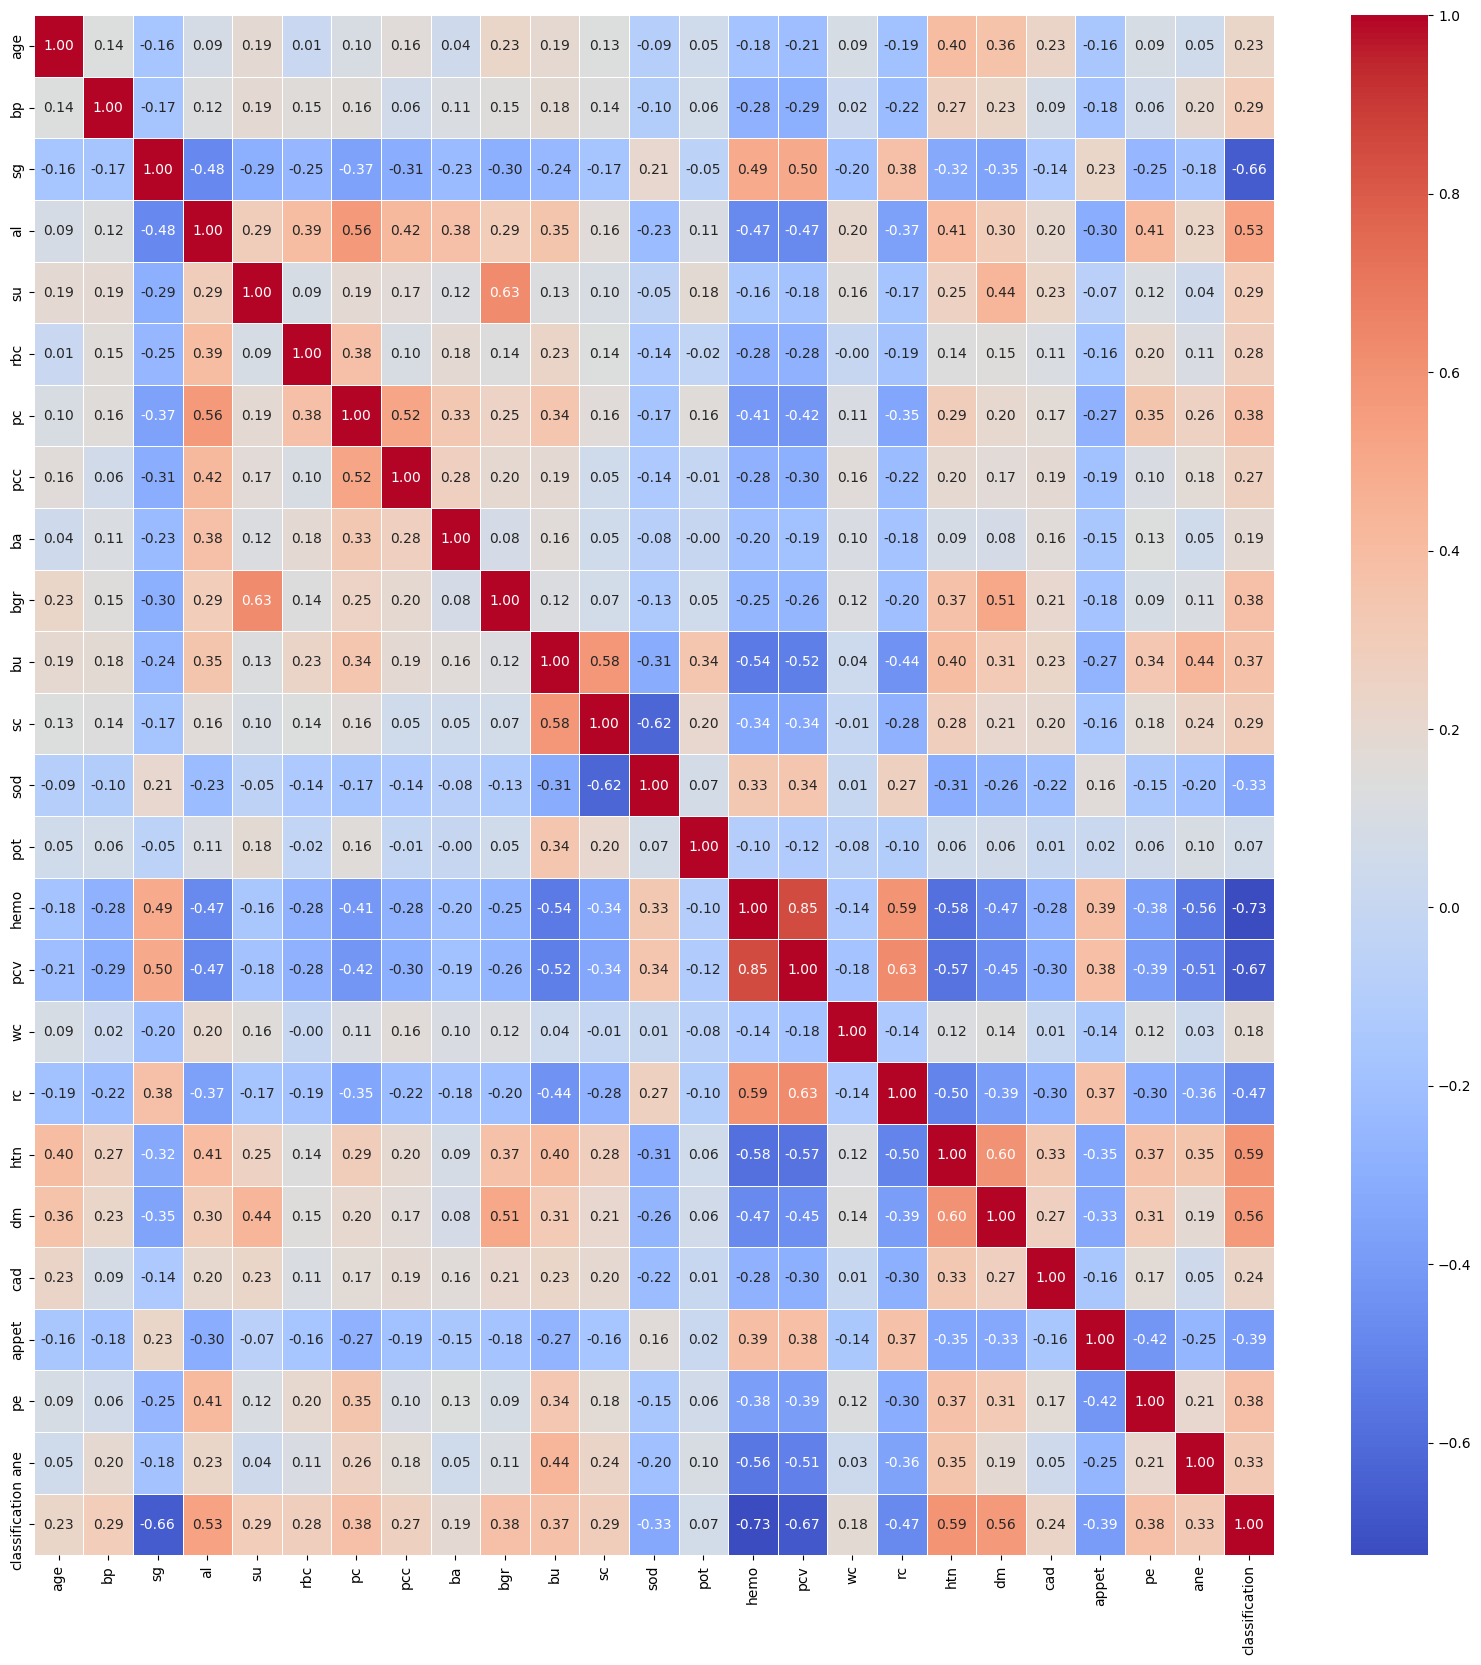

In [67]:
df_numeric = df.copy()
df_numeric = df_numeric.apply(pd.to_numeric, errors='coerce')  # Convert valid numbers, set invalid ones to NaN

plt.figure(figsize=(20, 20))
sns.heatmap(df_numeric.corr(), annot=True, fmt=".2f", linewidths=0.5, cmap='coolwarm')
plt.show()

In [72]:
df_numeric = df.apply(pd.to_numeric, errors='coerce')

# Now compute correlation
df_corr = df_numeric.corr()

In [106]:
X = df.drop(['classification', 'sg', 'appet', 'rc', 'pcv', 'hemo', 'sod'], axis = 1)
y = df['classification']

In [107]:
X.columns

Index(['age', 'bp', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu', 'sc',
       'pot', 'wc', 'htn', 'dm', 'cad', 'pe', 'ane'],
      dtype='object')

**USING RANDOMFORSTREGRESSION**

In [108]:
from sklearn.model_selection import train_test_split

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [110]:
from sklearn.ensemble import RandomForestClassifier

In [116]:
df = df.astype(str)

# Apply Label Encoding
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store encoder for inverse transformation if needed

# Now, define X and y properly
X = df.drop(columns=['classification', 'sg', 'appet', 'rc', 'pcv', 'hemo', 'sod'],axis = 1)  # Replace 'target_column' with the actual target column name
y = df['classification']

# Split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
from sklearn.ensemble import RandomForestClassifier
modelRand = RandomForestClassifier(n_estimators=20)
modelRand.fit(X_train, y_train)


RandomForestClassifier(n_estimators=20)

In [112]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [117]:
confusion_matrix(y_test, modelRand.predict(X_test))

array([[28,  0],
       [ 2, 50]])

In [118]:
print(f"Accuracy is {round(accuracy_score(y_test, modelRand.predict(X_test))*100, 2)}%")

Accuracy is 97.5%


In [115]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predictions
y_pred = modelRand.predict(X_test)

# Calculate Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Display Results
print(f"✅ Accuracy: {accuracy:.4f}")
print(f"✅ Precision: {precision:.4f}")
print(f"✅ Recall: {recall:.4f}")
print(f"✅ F1 Score: {f1:.4f}")


✅ Accuracy: 0.9750
✅ Precision: 1.0000
✅ Recall: 0.9615
✅ F1 Score: 0.9804


In [119]:
import pickle
pickle.dump(modelRand, open('kidney.pkl', 'wb'))

In [120]:
print("Actual:", y_test.tolist()[:10])
print("Predicted:", y_pred.tolist()[:10])




Actual: [1, 0, 1, 1, 1, 1, 0, 1, 0, 1]
Predicted: [0, 0, 1, 1, 1, 1, 0, 1, 0, 1]


**USING XGBOOST**

In [89]:
from xgboost import XGBClassifier

In [90]:
model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [91]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

Accuracy: 0.975


In [96]:
from sklearn.model_selection import RandomizedSearchCV

In [98]:
params={'learning-rate':[0,0.5,0.20,0.25],
        'max_depth':[5,8,10],
       'min_child_weight':[1,3,5,7],
       'gamma':[0.0,0.1,0.2,0.4],
       'colsample_bytree':[0.3,0.4,0.7]}

In [100]:
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [101]:
random_search.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           callbacks=None, colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=0.3, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=0.2, gpu_id=-1,
                                           grow_policy=None,
                                           importance_type='gain',
                                           interaction_constraints='',
                                           learning...
                                           max_leaves=None, min_child_weight=1,
                                           missing=nan,
                                           monotone_constraints='()',
                                           multi_strategy=None,
                                           n_estimators=100, n_jobs=8,
                                           num_parallel_tree=1, ...),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.4],
                                        'learning-rate': [0, 0.5, 0.2, 0.25],
                                        'max_depth': [5, 8, 10],
                                        'min_child_weight': [1, 3, 5, 7]},
                   scoring='roc_auc', verbose=3)

In [102]:
classifier=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0.2, gpu_id=-1,
              importance_type='gain', interaction_constraints='', learning_rate=0.300000012, max_delta_step=0,
              max_depth=5, min_child_weight=1,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [103]:
classifier.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.3,
              device=None, early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0.2, gpu_id=-1,
              grow_policy=None, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=0, max_depth=5, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              multi_strategy=None, n_estimators=100, n_jobs=8,
              num_parallel_tree=1, ...)

In [104]:
y_pred=classifier.predict(X_test)

In [105]:
accuracy_score(y_test,y_pred)

0.95

**USING OPTIMISED XGBoost(HYPERPARAMETERS)**

In [121]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint


In [122]:
param_dist = {
    'n_estimators': randint(50, 300),  # Number of trees (50 to 300)
    'max_depth': randint(3, 10),       # Tree depth (3 to 10)
    'learning_rate': uniform(0.01, 0.2),  # Learning rate (0.01 to 0.2)
    'colsample_bytree': uniform(0.5, 0.5),  # Feature sampling
    'subsample': uniform(0.5, 0.5)    # Data sampling
}


In [127]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

random_search = RandomizedSearchCV(
    xgb_model, param_distributions=param_dist,
    n_iter=20, cv=5, scoring='accuracy', n_jobs=-1, random_state=42
)

random_search.fit(X_train, y_train)

# Print best parameters
print("Best Hyperparameters:", random_search.best_params_)


Best Hyperparameters: {'colsample_bytree': np.float64(0.6975751180009072), 'learning_rate': np.float64(0.19533177315875885), 'max_depth': 9, 'n_estimators': 97, 'subsample': np.float64(0.6632703844029177)}


In [124]:
best_xgb = random_search.best_estimator_
y_pred = best_xgb.predict(X_test)

from sklearn.metrics import accuracy_score
print(f"Optimized XGBoost Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")


Optimized XGBoost Accuracy: 98.75%


In [129]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predictions
y_pred = best_xgb.predict(X_test)

# Calculate Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Display Results
print(f"✅ Accuracy: {accuracy:.4f}")
print(f"✅ Precision: {precision:.4f}")
print(f"✅ Recall: {recall:.4f}")
print(f"✅ F1 Score: {f1:.4f}")

✅ Accuracy: 0.9875
✅ Precision: 1.0000
✅ Recall: 0.9808
✅ F1 Score: 0.9903


In [125]:
import pickle
pickle.dump(xgb_model, open('kidneyHP.pkl', 'wb'))